In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("updatedData.csv")
data.head(5)

,Unnamed: 0.1,Unnamed: 0,r_fighter,b_fighter,referee,date,location,winner,title_bout,weight_class,...,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age,genders
0,0,0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,...,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,male
1,1,1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,...,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,male
2,2,2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,...,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,male
3,3,3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,...,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0,female
4,4,4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,...,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0,female


Number of male fighters in the dataset:  2032
Number of female fighters in the dataset:  333


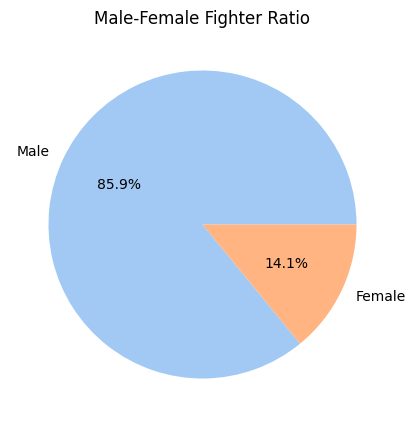

In [43]:
dataMale = data[data["genders"] == "male"]
dataFemale = data[data["genders"] == "female"]
dataMale.reset_index(drop=True, inplace=True)
dataFemale.reset_index(drop=True, inplace=True)

def getNames(df): #returns the unique names of fighters in the dataset
    names = []
    rNames = list(df["r_fighter"])
    bNames = list(df["b_fighter"])
    names = rNames + bNames
    # print(len(names))
    names = set(names)
    # print(len(names))
    return names

namesMale = list(getNames(dataMale))
namesFemale = list(getNames(dataFemale))

print("Number of male fighters in the dataset: ", len(namesMale))
print("Number of female fighters in the dataset: ", len(namesFemale))

countMen = len(namesMale)
countWomen = len(namesFemale)
genderCounts = [countMen, countWomen]
# Draw a plot that shows how imbalance male and female data is, use seaborn, draw a pie chart showing male female ratio
sns.set_palette("pastel")
plt.figure(figsize=(5,5))
plt.pie(genderCounts, labels=["Male", "Female"], autopct='%1.1f%%')
plt.title("Male-Female Fighter Ratio")
plt.show()

In [45]:
# Now we will normalize it and see whether they get equal opportunitues for matches or not 
# We will use the number of fights as a measure of opportunity
# We will also use the number of wins as a measure of performance

def getFights(df, name): #returns the number of fights of a fighter
    count = 0
    for i in range(len(df)):
        if df["r_fighter"][i] == name or df["b_fighter"][i] == name:
            count += 1
    return count

def worker(df, names) : #returns a dictionary with fighter name as key and number of fights as value
    dict = {}
    for name in names:
        dict[name] = getFights(df, name)
    return dict

codexMale = worker(dataMale, namesMale)
codexFemale = worker(dataFemale, namesFemale)
maleTotalMatches = sum(codexMale.values())
femaleTotalMatches = sum(codexFemale.values())
print(maleTotalMatches , femaleTotalMatches)

11008 1016


5.417322834645669 3.051051051051051


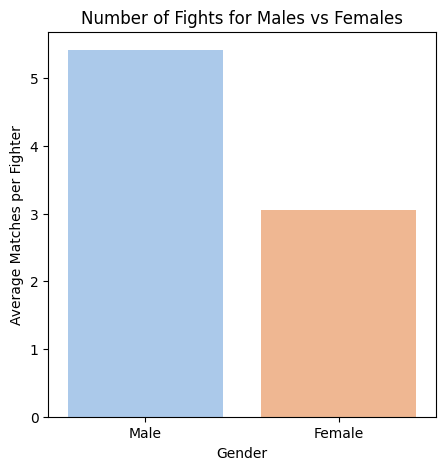

In [71]:
maleMatchesPerFighter = (maleTotalMatches / countMen)
femaleMatchesPerFighter = (femaleTotalMatches / countWomen)

print(maleMatchesPerFighter , femaleMatchesPerFighter)

# Now we will plot a graph to show the difference in the number fights for males vs females

sns.set_palette("pastel")
plt.figure(figsize=(5,5))
sns.barplot(x=["Male", "Female"], y=[maleMatchesPerFighter, femaleMatchesPerFighter])
plt.xlabel("Gender")
plt.ylabel("Average Matches per Fighter")
plt.title("Number of Fights for Males vs Females")
plt.show()


In [ ]:
# calculate the percentage difference for males vs females

percentDiff = ((maleMatchesPerFighter - femaleMatchesPerFighter) / femaleMatchesPerFighter) * 100